# Analytical and numerical calculation of the order of approximation of a derivative calculated through finite differences (optional).

## 1 – The numerical test of the high-order formula

Implement the finite difference formula given by the first term on the right of Eq (5) in the [wiki](https://github.com/AST-Course/AST5110/wiki/Discretization)  into the program you developed for Exercise 1a and test if you get an approximation to the first derivative with an error that converges to zero like $(\Delta x)^4$.

Compare the 2nd-order and 4th-order error curves. Which error do you get in either case for 128 intervals? For 512 intervals? For 1024 intervals?

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from nm_lib import nm_lib as nm
import importlib
importlib.reload(nm)

<module 'nm_lib.nm_lib' from '/Users/juanms/Numerical_sim_course/students_2023/master/Christophe_Kristian_Blomsen/nm_lib/nm_lib/nm_lib.py'>

In [2]:
def h(x):
    """
    Equation (1) from above

    Parameters
    ----------
    x   :   `array`
            Spatial axis
    
    Returns
    -------
    `array`
        The solution over the spatial axis
    """
    ans = np.cos(np.pi*(x-1)/2)*np.exp(-((x-3)/2.5)**2)
    return ans

def dh(xx):
    """
    The analytical derivate of h(x)
    # Hand calculations were wrong
    u = np.cos(np.pi*(xx-1)/2)
    v = np.exp(-((xx-3)/2.5)**2)
    
    du = - np.pi/2 * np.sin(np.pi*(xx - 1)/2)
    dv = - 2*((xx-3)/2.5)*(1/2.5)*np.exp(- ((xx-3)/2.5)**2)
    
    ans = du*v + v*dv

    Parameters
    ----------
    xx  :   `array`
            Spatial axis
    """
    # Wolfram alpha
    ans = np.exp( -0.16 * (-3 + xx)**2) * (1.5708 * np.cos((np.pi*xx) / 2) - (-0.96 + 0.32 * xx) * np.sin((np.pi * xx) / 2))
    return ans

In [3]:
nump = 65
x0 = -4.0
xf = 10.0

xx = np.arange(nump)/(nump - 1.0) * (xf-x0) + x0
hh = h(xx)
y = nm.deriv_4tho(xx, hh)

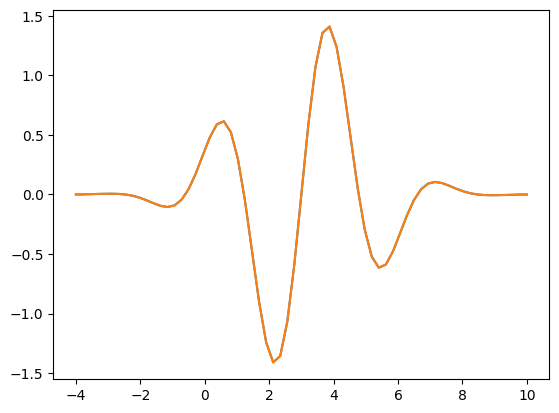

In [4]:
plt.plot(xx, y)
plt.plot(xx, dh(xx))

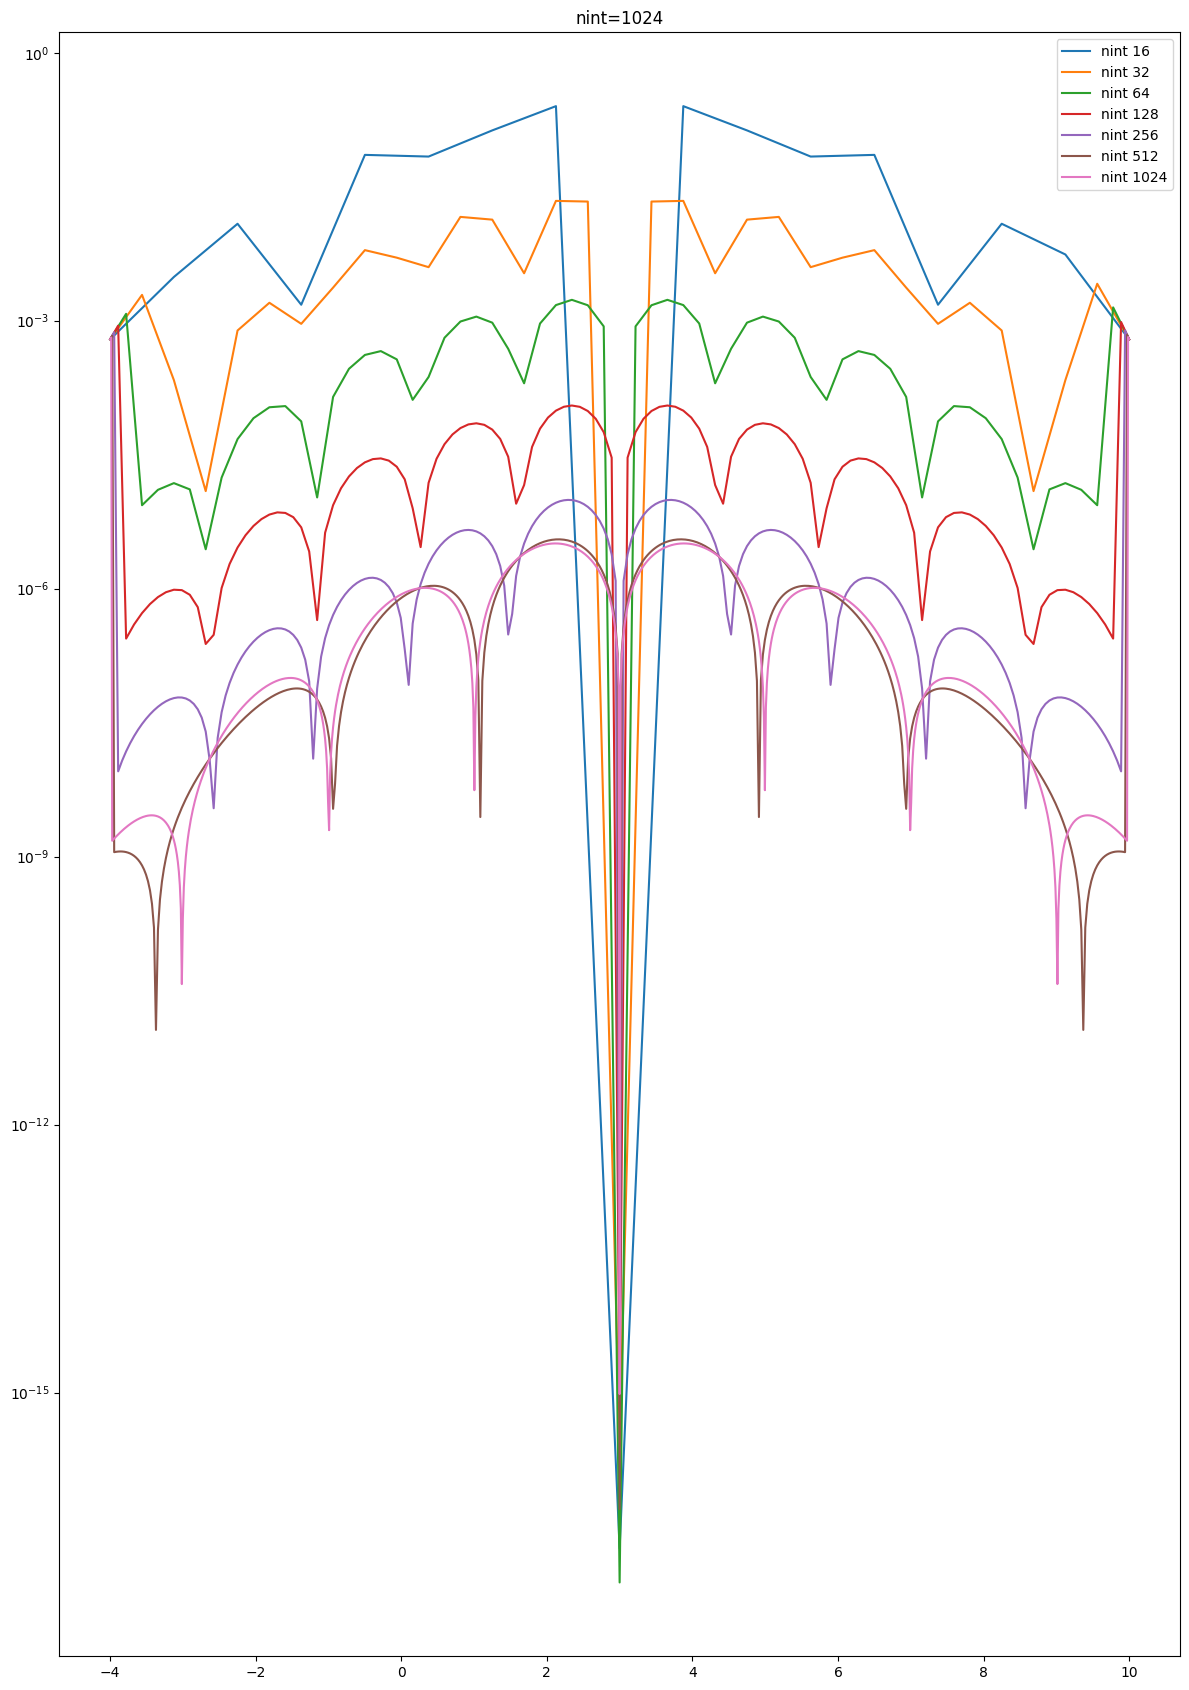

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12, 17))
l = 0
abs_err = []
dxs = []

for i in range(4, 11):
    nint = 2**i
    nump = nint + 1
    xx = np.arange(nump)/(nint) * (xf - x0) + x0
    
    dx = xx[1] - xx[0]

    y = nm.deriv_4tho(xx, h(xx))
    y_exact = dh(xx)
    
    abs_err.append(np.mean(abs(y[2:-2]-y_exact[2:-2])))
    dxs.append(dx)

    ax.set_title(f'nint={nint}')
    ax.semilogy(xx, abs(y-y_exact), label=f'nint {nint}')
    ax.legend()

plt.tight_layout()

In [6]:
z = np.polyfit(np.log10(dxs[:-3]), np.log10(abs_err[:-3]), deg=1)
p = np.poly1d(z)
print(p)

 
3.856 x - 0.828


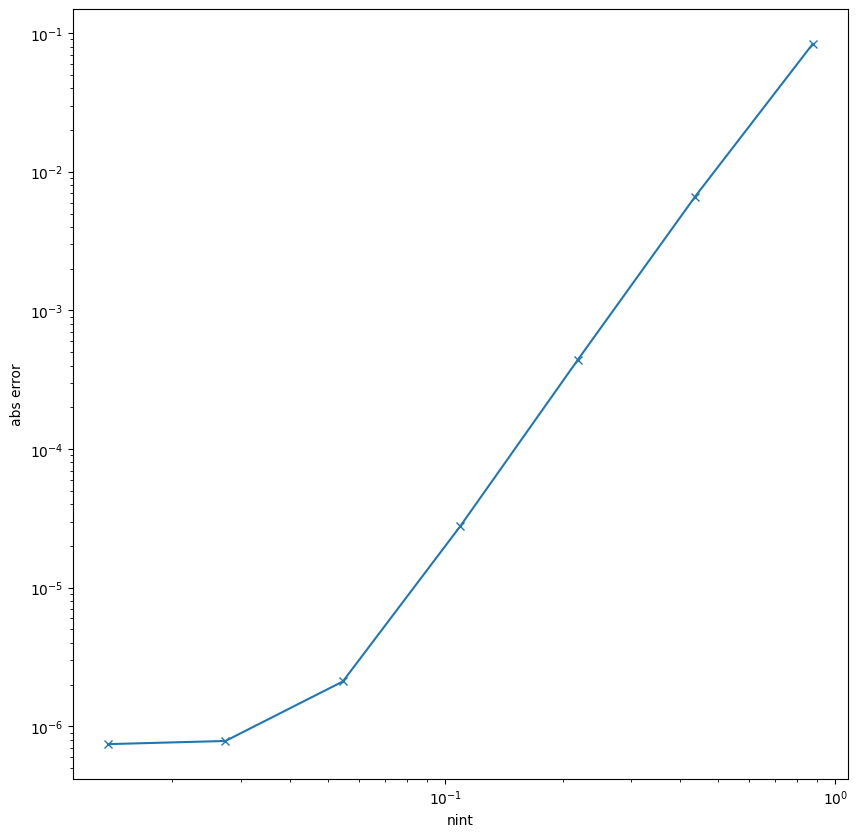

In [7]:

nint_list = [2**i for i in range(4, 11)]

fig = plt.figure(figsize=(10,10))
plt.ylabel('abs error')
plt.xlabel("nint")

plt.loglog(dxs, abs_err, '-x')

<span style="color:green">JMS</span>.

<span style="color:red"> Please explains how did you do the steps, and the output/results/conclusions/interpretation in a few sentences. </span>.

#### Redoing most of the analysis from [1a](ex_1a_v0.5.ipynb). I make a polyfit of the mean average. And see that the coefficient is almost to the power 4, in the loglog plot.  

## 2 - Precission

Try for more than $10^6$ grid points. What do you see? What happens if you try for a lower or higher floating number? Numpy uses float 64 as default. Instead, use `np.float32` and `np.float128` (note: `np.float128` sometimes gives an error with `np.roll`!). Explain the error slopes. 

In [8]:
#fig, ax = plt.subplots(1, 1, figsize=(12, 17))

abs_err_32 = []
dxs_32 = []

abs_err_64 = []
dxs_64 = []
for i in range(6):
    n = 32 + 2**i
    nint = np.float32(n)
    nump = np.float32(nint + 1)
    xx = np.float32(np.arange(nump)/(nint) * (xf - x0) + x0)

    dx = np.float32(xx[1] - xx[0])

    y = np.float32(nm.deriv_dnw(xx, h(xx)))
    y_exact = np.float32(dh(xx))

    diff = np.abs(y-y_exact)
    
    dxs_32.append(dx)
    abs_err_32.append(np.mean(diff[1:]))

    #ax.set_title(f'nint={nint}')
    #ax.semilogy(xx, diff, '-x', label=f'32, nint: {nint}')
        
    nint_64 = np.float64(n)
    nump_64 = np.float64(nint_64 + 1)
    xx_64 = np.float64(np.arange(nump_64)/(nint_64) * (xf - x0) + x0)

    dx_64 = np.float64(xx_64[1] - xx_64[0])

    y_64 = np.float64(nm.deriv_dnw(xx_64, h(xx)))
    y_exact_64 = np.float64(dh(xx_64))

    diff_64 = np.abs(y_64-y_exact_64)

    dxs_64.append(dx_64)
    abs_err_64.append(np.mean(diff_64[1:]))

    #ax.semilogy(xx_64, diff_64, '-x', label=f'64, nint: {nint}')
#plt.legend()
    

In [9]:
print(np.shape(dxs_32))
z = np.polyfit(np.log10(dxs_32), np.log10(abs_err_32), deg=1)
p = np.poly1d(z)

z_64 = np.polyfit(np.log10(dxs_64), np.log10(abs_err_64), deg=1)
p_64 = np.poly1d(z_64)

(6,)


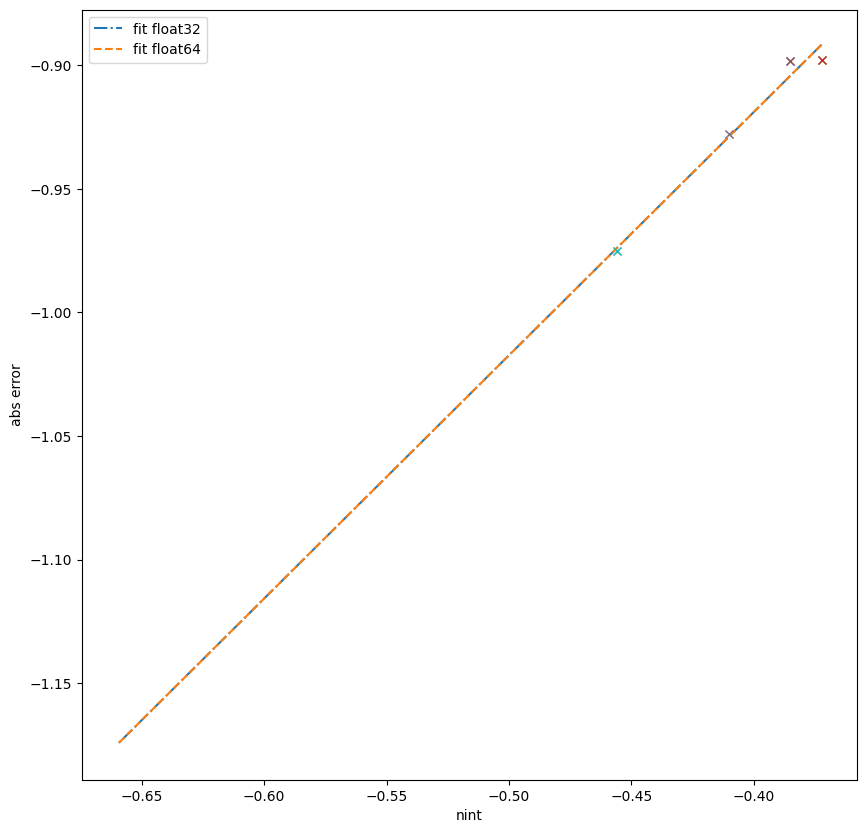

In [10]:
fig = plt.figure(figsize=(10,10))
plt.ylabel('abs error')
plt.xlabel("nint")
plt.plot(np.log10(dxs_32), p(np.log10(dxs_32)), '-.', label='fit float32')
plt.plot(np.log10(dxs_64), p_64(np.log10(dxs_64)), '--', label='fit float64')
for i in range(4):
    plt.plot(np.log10(dxs_32[i]), np.log10(abs_err_32[i]), '-x')
    plt.plot(np.log10(dxs_64[i]), np.log10(abs_err_64[i]), '-x')
plt.legend()

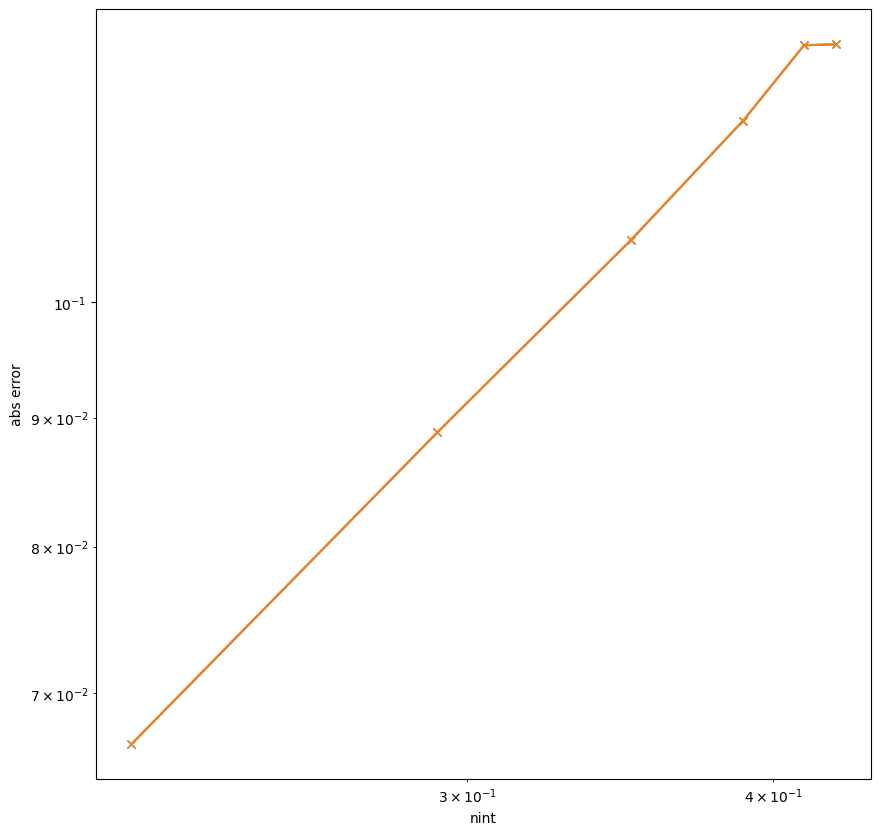

In [11]:
fig = plt.figure(figsize=(10,10))
plt.ylabel('abs error')
plt.xlabel("nint")

plt.loglog(dxs_32, abs_err_32, '-x')
plt.loglog(dxs_64, abs_err_64, '-x')

<span style="color:green">JMS</span>.

<span style="color:blue"> Better.</span>.

<span style="color:red"> Please explains how did you do the steps, and the output/results/conclusions/interpretation in a few sentences. </span>.